In [56]:
%pylab inline
from utils import *

set_paper_rcs()

date = '05-19-074517'
res_dir = '../results/'+date+'/'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(<matplotlib.axes._axes.Axes at 0x10c942080>,
 <matplotlib.figure.Figure at 0x10c9d9b70>)

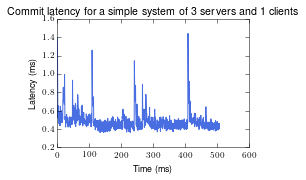

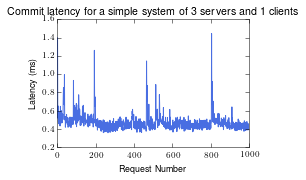

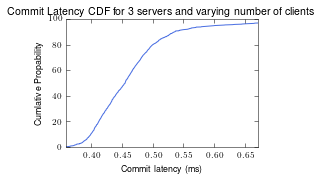

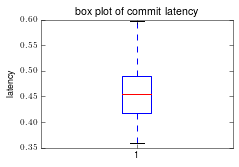

In [19]:
# SIMPLE: a simple 3 server and 1 client system

simple = read_results_file(res_dir+'simple/results/latency_1.csv')

draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['time'],simple['latency'])

draw_line_graph('Request Number', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['reqs'],simple['latency'])
draw_cdf('Commit latency (ms)', 
         'Commit Latency CDF for 3 servers and varying number of clients',
         simple['latency'])

draw_boxplot("latency","box plot of commit latency",simple['latency'])

In [20]:
# LOAD TESTING DATA 


clients = range(1,25)
latency = {}
latency_by_client = {}
req_by_client = {}
time_by_client = {}

for c in clients:
    latency[c]=[]
    latency_by_client[c] = {}
    req_by_client[c] = {}
    time_by_client[c] = {}
    for client in range(1,c+1):
        res = read_results_file(res_dir+'load/'+str(c)+'c/results/latency_'+str(client)+'.csv')
        latency_by_client[c][client] = res['latency']
        latency[c] = latency[c] + (res['latency'])
        req_by_client[c][client] = res['reqs']
        time_by_client[c][client] = res['time']     

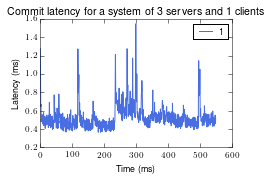

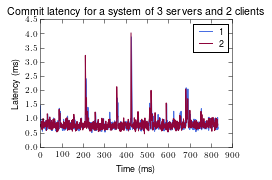

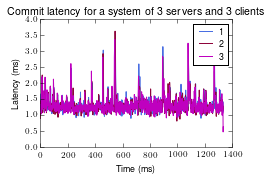

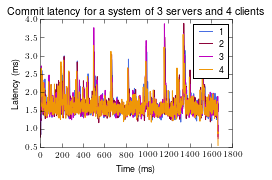

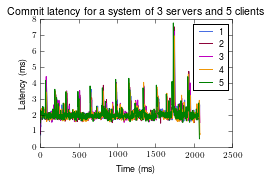

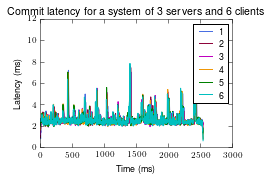

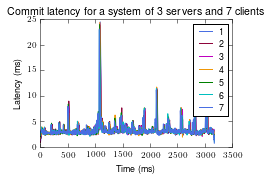

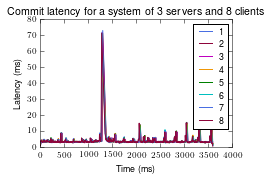

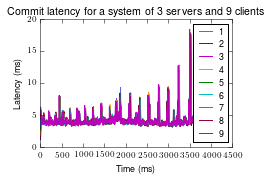

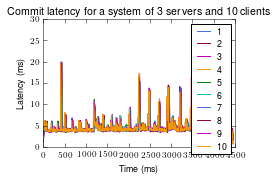

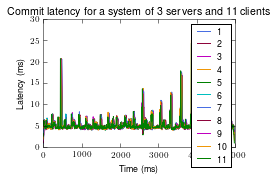

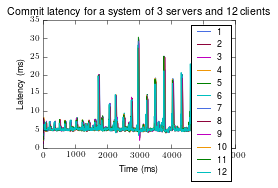

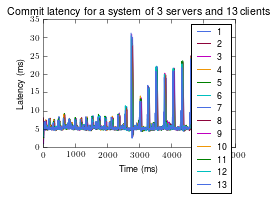

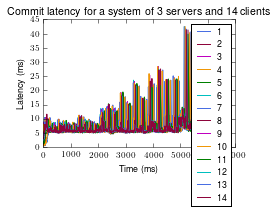

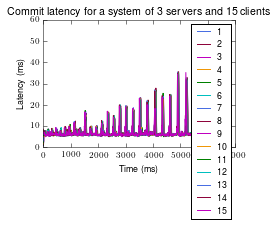

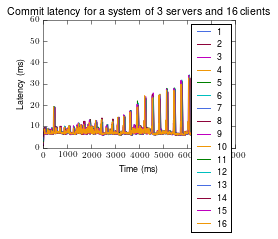

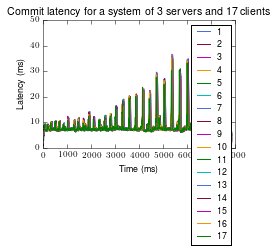

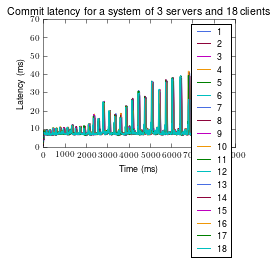

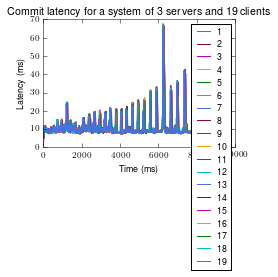

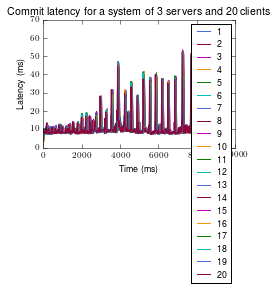

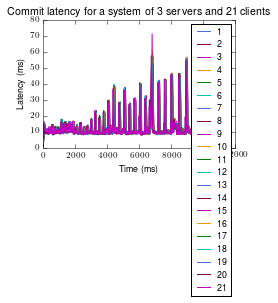

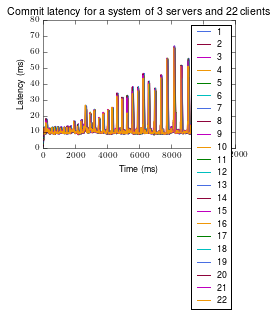

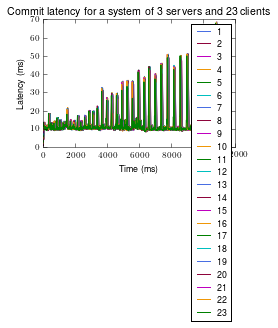

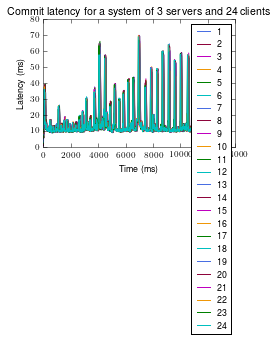

In [21]:
# plotting latency over actual time (for X client systems)

for c in clients:
    draw_lines_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a system of 3 servers and '+str(c)+' clients', 
                    time_by_client[c],latency_by_client[c],range(1,c+1))



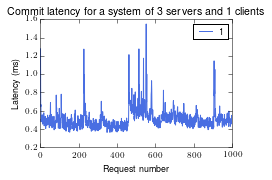

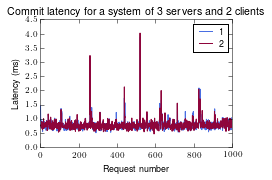

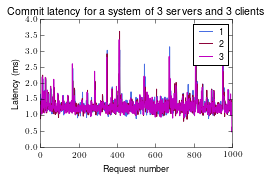

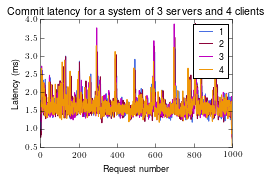

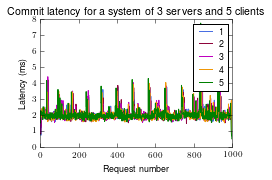

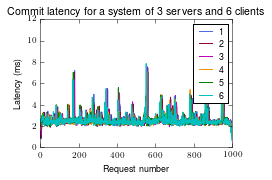

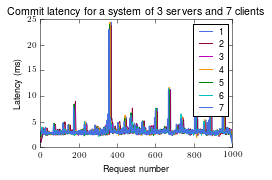

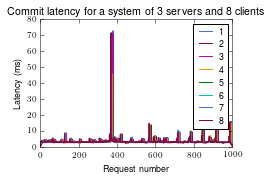

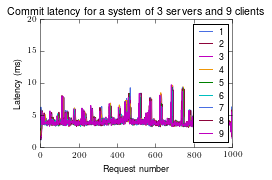

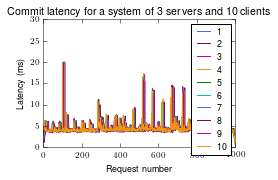

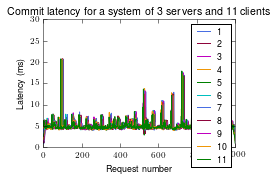

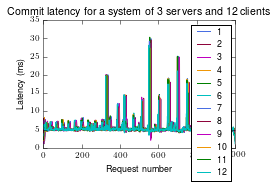

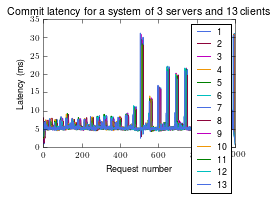

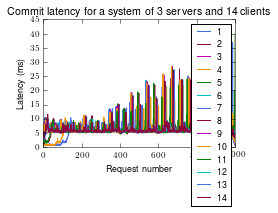

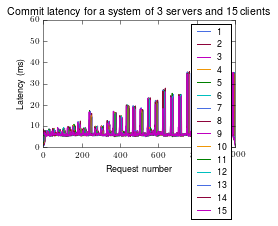

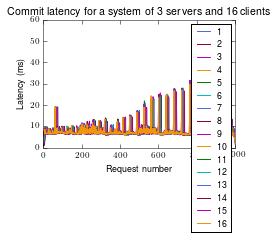

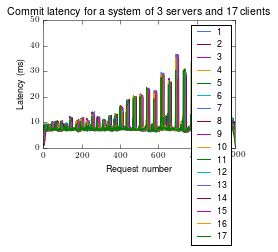

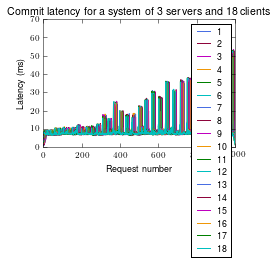

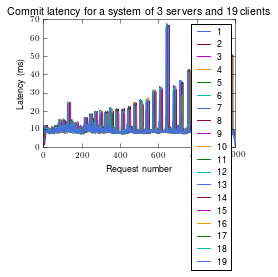

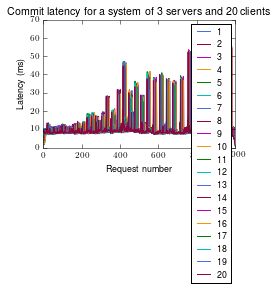

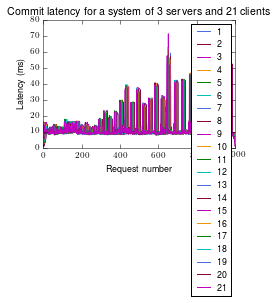

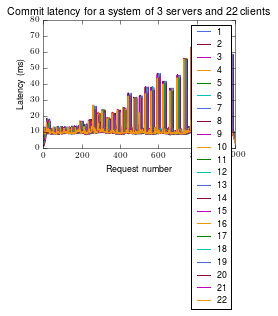

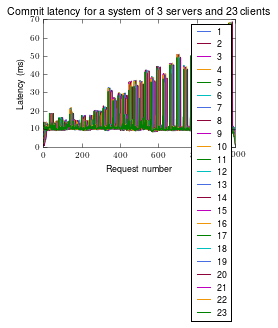

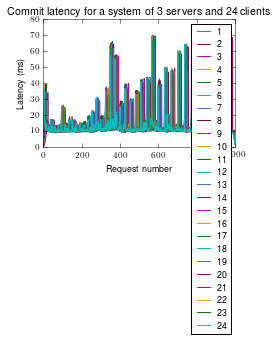

In [22]:
# plotting latency over request time (for X client system)

for c in clients:
    draw_lines_graph('Request number','Latency (ms)','Commit latency for a system of 3 servers and '+str(c)+' clients',
                    req_by_client[c], latency_by_client[c], range(1,c+1))


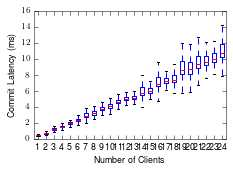

In [23]:
axes, fig = draw_boxplots("Number of Clients","Commit Latency (ms)","",latency,clients)
fig_to_file(fig,"load_latency_boxplot","pdf")

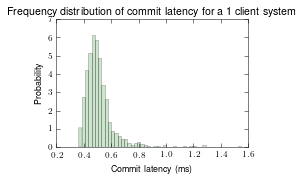

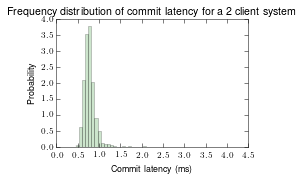

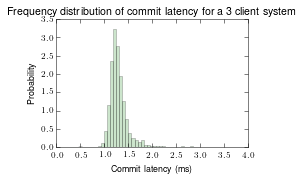

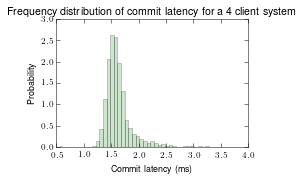

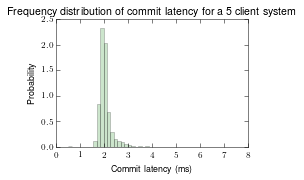

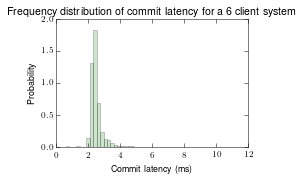

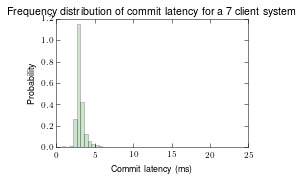

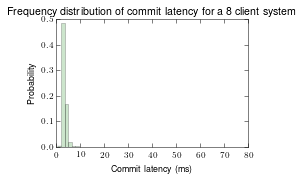

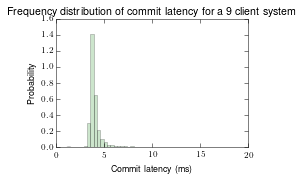

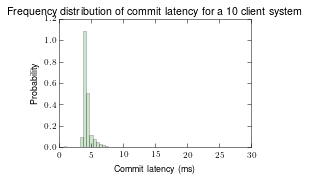

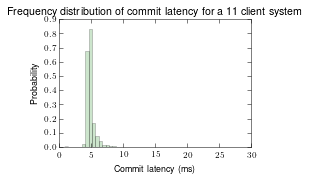

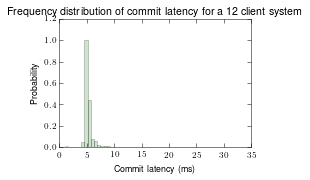

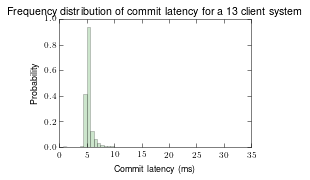

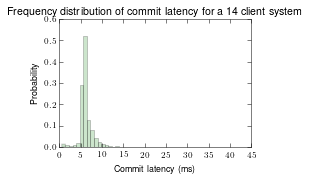

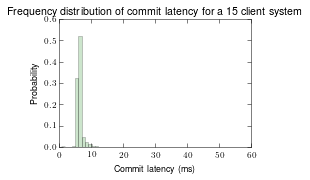

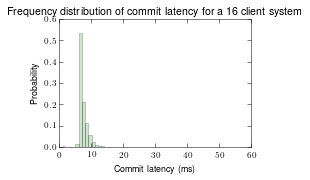

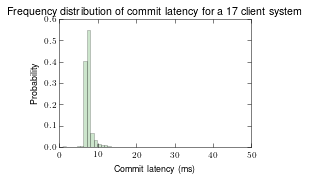

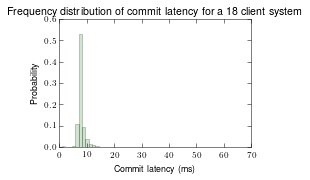

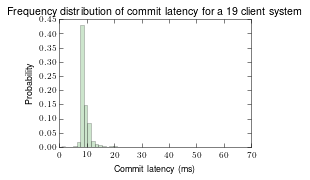

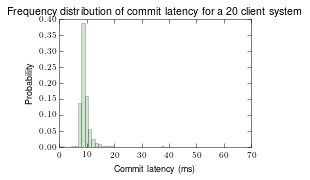

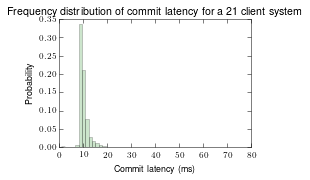

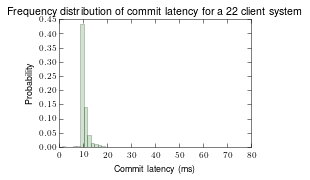

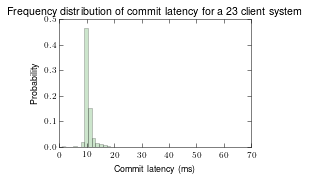

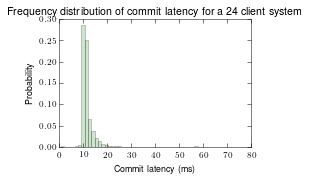

In [24]:
# plot latency distribution (for X client system)

for c in clients:
    draw_histo('Commit latency (ms)',
               'Frequency distribution of commit latency for a '+str(c)+' client system',
               latency[c],50)



(<matplotlib.axes._axes.Axes at 0x11088c240>,
 <matplotlib.figure.Figure at 0x112975b00>)

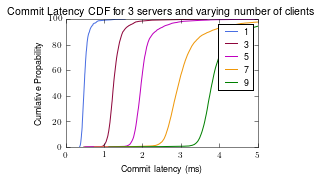

In [25]:
# plot simple CFD

draw_cdfs('Commit latency (ms)', 
         'Commit Latency CDF for 3 servers and varying number of clients',
         latency,[1,3,5,7,9])



1000 548.3744089999618
2000 833.6748030001218
3000 1335.2666180001052
4000 1669.1191400000207
5000 2079.802240999925
6000 2547.8867459999037
7000 3178.045253999926
8000 3600.7192360000317
9000 4053.7731759998223
10000 4455.553545999919
11000 4987.884056999974
12000 5419.687669000041
13000 5566.986437999958
14000 6547.029266999971
15000 6644.804475000001
16000 7707.923840999911
17000 7866.9125319997875
18000 8284.23229100008
19000 9634.770274999937
20000 9800.306209999917
21000 10625.694522999993
22000 10800.67556899985
23000 11139.416801999914
24000 12355.238441999973


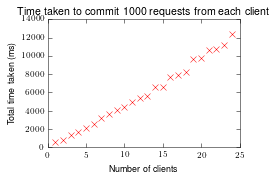

In [26]:
# calc throughput per client
throughput_by_client = {}
time_taken = []
throughput=[]

for c in clients:
    throughput_by_client[c] = {}
    reqs = 0
    time = 0
    for client in range(1,c+1):
        reqs += int(req_by_client[c][client][-1])
        new_time = time_by_client[c][client][-1]
        if new_time >time:
            time=new_time
    print(reqs,time)
    time_taken.append(time)
    throughput.append(reqs*1000/time)
    
_,fig = draw_simple_plot('Number of clients','Total time taken (ms)','Time taken to commit 1000 requests from each client',clients,time_taken)
fig_to_file(fig,"load_timetaken","pdf")

range(1, 25)
[1823.5716028828574, 2399.0169701694917, 2246.7423056627063, 2396.473627400828, 2404.074724718109, 2354.8927398047804, 2202.6118071131036, 2221.778338065326, 2220.1538194796112, 2244.390039701743, 2205.3439643535116, 2214.149732029495, 2335.1951984762673, 2138.374433510847, 2257.402765790185, 2075.7859483370817, 2160.949410693214, 2172.8024236542774, 1972.024185081063, 2040.75256134269, 1976.3414009826993, 2036.9096228706753, 2064.7400495751895, 1942.495898615378]
[0.48805149999999997, 0.76342500000000002, 1.2510275, 1.5701420000000001, 1.9685429999999999, 2.3884059999999998, 2.9478344999999999, 3.2389419999999998, 3.8168594999999996, 4.0985239999999994, 4.6680700000000002, 5.0485845000000005, 5.1627270000000003, 5.8256224999999997, 6.0594970000000004, 6.9033980000000001, 7.2704509999999996, 7.4513805, 8.6058370000000011, 8.7450185000000005, 9.4018289999999993, 9.6610280000000017, 10.076012, 10.730473499999999]


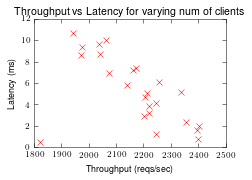

In [27]:
# plotting throughput vs latency

medium_latency=[]

for c in clients:
    medium_latency.append(np.percentile(latency[c],50))
    

draw_simple_plot('Throughput (reqs/sec)','Latency (ms)','Throughput vs Latency for varying num of clients',throughput,medium_latency)
print(clients)
print(throughput)
print(medium_latency)


(1, 14)

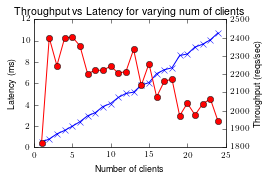

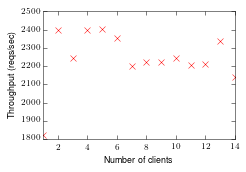

In [28]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Number of clients')
axes.set_ylabel('Latency (ms)')
axes.set_title('Throughput vs Latency for varying num of clients')

axes.plot(clients, medium_latency,"bx-") 

axes2 = axes.twinx()
axes2.set_ylabel('Throughput (reqs/sec)')
axes2.plot(clients, throughput,"ro-")

axes, fig = draw_simple_plot('Number of clients','Throughput (reqs/sec)','',clients, throughput)
axes.set_xlim([1,14])


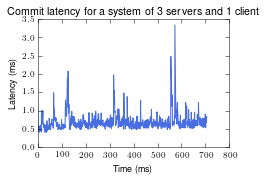

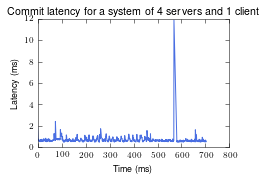

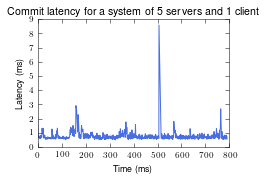

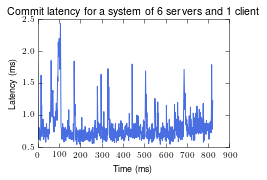

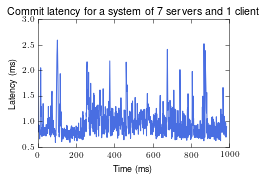

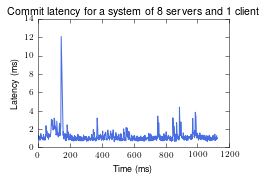

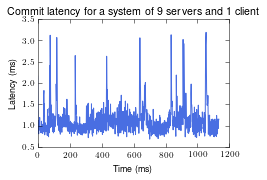

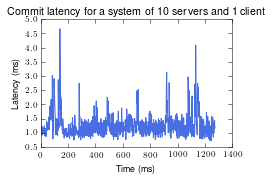

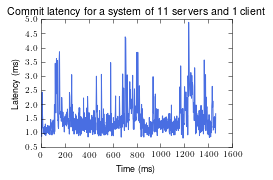

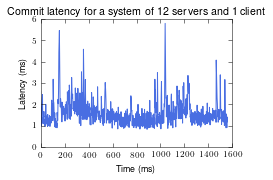

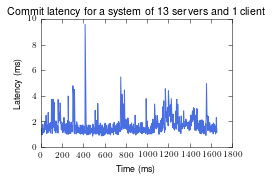

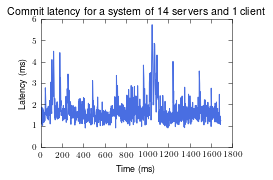

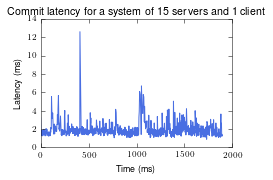

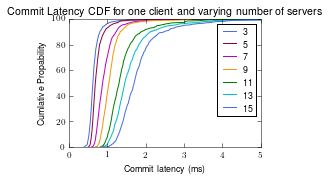

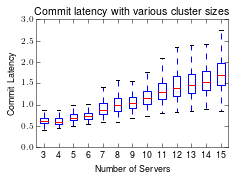

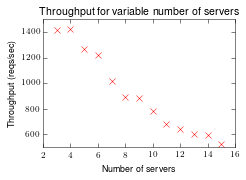

In [29]:
# SCALE: for other numbers of servers

serv_latency = {}
serv_throughput = []
servs = range(3,16)
servs_less = range(3,16,2)


for s in servs:
    scale = read_results_file(res_dir+'scale/'+str(s)+'s/results/latency_1.csv')
    serv_latency[s]= scale["latency"]
    serv_throughput.append(int(scale["reqs"][-1])*1000/scale["time"][-1])
    draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a system of '+str(s)+' servers and 1 client', 
                   scale['time'],scale['latency'])
    
draw_cdfs('Commit latency (ms)','Commit Latency CDF for one client and varying number of servers',serv_latency,servs_less)

_, fig2 = draw_boxplots("Number of Servers","Commit Latency","Commit latency with various cluster sizes",serv_latency,servs)
fig_to_file(fig2,"scale_latency_boxplot","pdf")
_, fig3 = draw_simple_plot("Number of servers","Throughput (reqs/sec)","Throughput for variable number of servers",servs,serv_throughput)
fig_to_file(fig3,"scale_throughput","pdf")

(<matplotlib.axes._axes.Axes at 0x110c7c8d0>,
 <matplotlib.figure.Figure at 0x10a0043c8>)

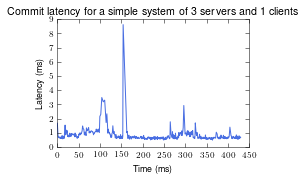

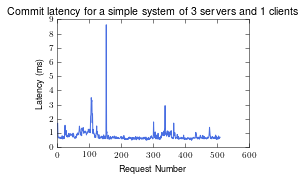

In [30]:
# FAILURE: testing master failure in a 5 node system

simple = read_results_file(res_dir+'failure/results/latency_1.csv')

axes = draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['time'],simple['latency'])

#axes.axvline(60,0,7)

draw_line_graph('Request Number', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['reqs'],simple['latency'])

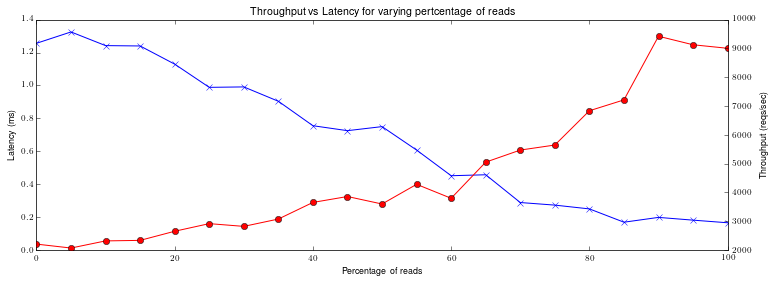

In [31]:
# READ: how does special treatment of read requests improve throughput and latency

read_latency = {}
read_time = {}

read_medium_latency=[]
read_throughput=[]

perts = range(0,101,5)

for pert in perts:
    read_latency[pert] = []
    time = 0
    reqs = 0
    for client in range(1,4):
        res = read_results_file(res_dir+'read/'+str(pert)+'r/results/latency_'+str(client)+'.csv')
        read_latency[pert] = read_latency[pert] + (res['latency'])
        if time < res['time'][-1]:
            time = res['time'][-1]
        reqs += int(res['reqs'][-1])
    read_time[pert] = res['time']   
    read_throughput.append(reqs*1000/time)
    read_medium_latency.append(np.percentile(read_latency[pert],50))
        
fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Percentage of reads')
axes.set_ylabel('Latency (ms)')
axes.set_title('Throughput vs Latency for varying pertcentage of reads')

axes.plot(perts, read_medium_latency,"bx-") 

axes2 = axes.twinx()
axes2.set_ylabel('Throughput (reqs/sec)')
axes2.plot(perts, read_throughput,"ro-") 
 

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
[14.254206499999999, 3.3790909999999998, 3.4405060000000001, 3.4234830000000001, 3.6235084999999998, 3.7099129999999998, 3.6738469999999999, 3.4531459999999998, 3.4855209999999999, 3.9155389999999999, 4.0007529999999996, 3.406193, 3.6279810000000001, 3.3344180000000003, 3.5737640000000002, 3.5494949999999998, 3.9530340000000002, 3.9374544999999999, 3.7526579999999998, 3.8310719999999998, 3.8178399999999999]


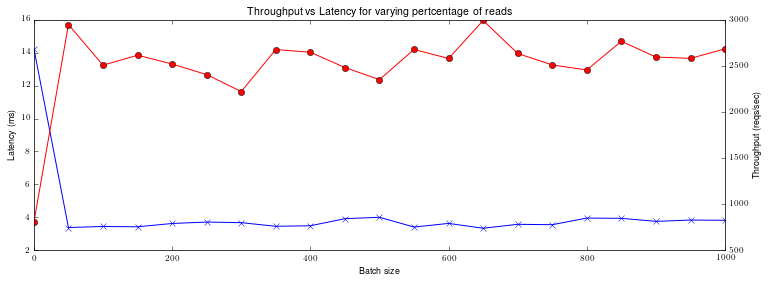

In [60]:
# BATCH: how does batching improve throughput

def batch():
    latency = {}
    time = {}

    medium_latency=[]
    throughput=[]

    var = list(range(0,1000+1,50))

    for v in var:
        latency[v] = []
        time[v] = []
        total_reqs = 0
        max_time = 0
        for c in range(1,16+1):
            res = read_results_file(res_dir+'batch/'+str(v)+'r/results/latency_'+str(c)+'.csv')
            latency[v] = latency[v] + res['latency']
            time[v] = time[v] + res['time']
            total_reqs = total_reqs + int(res['reqs'][-1])
            if res['time'][-1] > max_time:
                max_time=res['time'][-1]
        throughput.append(total_reqs*1000/max_time)
        medium_latency.append(np.percentile(latency[v],50))
    print(var)
    print(medium_latency)

    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel('Batch (microseconds)')
    axes.set_ylabel('Latency (ms)')
    axes.set_title('Impact of batching on Throughput vs Latency')

    axes.plot(var, medium_latency,"bx-") 

    axes2 = axes.twinx()
    axes2.set_ylabel('Throughput (reqs/sec)')
    axes2.plot(var, throughput,"ro-") 
 
batch()